### Load Dataset

In [3]:
# Basic packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/rizkiachr/Hypotesis-testing/main/House_prices.csv')
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
62,63,120,RL,44.0,6442,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,202500
1281,1282,20,RL,50.0,8049,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,180000
1021,1022,20,RL,64.0,7406,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,194000
162,163,20,RL,95.0,12182,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,New,Partial,220000


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Hypotesis Testing

- **H0:** (Rata-rata) Harga rumah **tidak mengalami kenaikan** setiap tahunnya
- **H1:** (Rata-rata) Harga rumah **mengalami kenaikan** setiap tahunnya

Pengujian yang akan dilakukan adalah **Uji-F (Anova)**

Pengujian ini akan berfokus pada 2 feature utama di dalam dateset, yaitu `YrSold` dan `SalePrice`

In [85]:
print('Jumlah baris di kolom SalePrice sebanyak', len(df['SalePrice']))
print('Jumlah baris di kolom YrSold sebanyak', len(df['YrSold']))

Jumlah baris di kolom SalePrice sebanyak 1460
Jumlah baris di kolom YrSold sebanyak 1460


In [19]:
# Memisahkan feature berdasarkan tahun
df_2006 = df[df['YrSold'] == 2006]
df_2007 = df[df['YrSold'] == 2007]
df_2008 = df[df['YrSold'] == 2008]
df_2009 = df[df['YrSold'] == 2009]
df_2010 = df[df['YrSold'] == 2010]

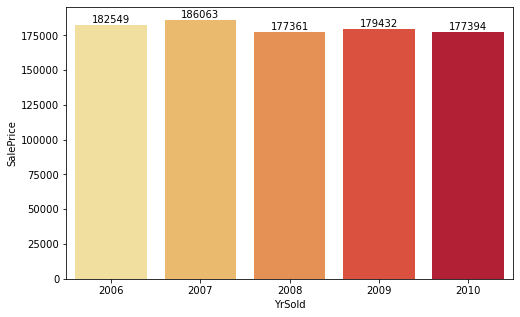

In [93]:
plt.figure(figsize=(8,5))
a = sns.barplot(x='YrSold', y='SalePrice', palette='YlOrRd', data=new_df)
a.bar_label(a.containers[0])
plt.tight_layout;

Apabila hanya membandingkan dengan nilai rata-rata di setiap tahunnya, terdapat perbedaan rata-rata harga rumah setiap tahunnya. Namun, apakah Uji Anova akan berkata demikian?

In [79]:
## Uji Anova
import scipy.stats as st
anova = st.f_oneway(df_2006['SalePrice'],df_2007['SalePrice'],df_2008['SalePrice'],df_2009['SalePrice'],df_2010['SalePrice'])
anova

F_onewayResult(statistic=0.6455252211679311, pvalue=0.6300887663573457)

In [78]:
#Hasil Pengujian
pvalue = anova.pvalue
print(pvalue)
if pvalue >= 0.05:
  print('Insufficient Reject H0')
else:
  print('Sufficient Reject H0')

0.6300887663573457
Insufficient Reject H0


### Result

Berdasarkan uji anova yang telah dilakukan, didapatkan nilai p-value sebesar 0.63, karena p-value > 0.05. Maka **tidak bisa menolak H0**, yang mana **rata-rata harga rumah tidak mengalami kenaikan setiap tahunnya.**